# UTS Machine Learning Kelompok 4

## Anggota Kelompok :
- Ema Nelvi Saleky (232300289)
- Philemon (232102317)
- Timotius (232203088)

## Deskripsi Project :  

Proyek ini bertujuan untuk mengembangkan dan mengimplementasikan model machine
learning yang dapat memprediksi gangguan tidur berdasarkan faktor kesehatan dan gaya hidup.
Model ini diharapkan mampu memberikan prediksi yang lebih akurat dibandingkan dengan
metode tradisional, serta menghasilkan wawasan baru tentang faktor-faktor utama yang
mempengaruhi gangguan tidur.

# Step 1. Import Dataset & Common Library Python
---


## 1. Import Common Library
---

Library Umum yang digunakan termasuk :
- Numpy (Pemrosesan data)
- Pandas (Container data)
- Matplotlib & Seaborn (Visualisasi data)
- Sklearn (Algoritma machine learning & metriks penilaian)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


## 2. Import dataset
---

Data Sleep, Health, and Lifestyle memiliki 400 baris dan 13 kolom yang menjelaskan tentang pola tidur dan kesehatan seseorang. Data ini memiliki fitur-fitur sebagai berikut :  

● Person ID: Nomor identifikasi untuk setiap orang.

● Gender: Jenis kelamin setiap orang.

● Age: Umur setiap orang dalam satuan tahun.

● Occupation: Pekerjaan setiap orang.

● Sleep Duration (hours): Waktu tidur setiap orang dalam satuan jam.

● Quality of Sleep (scale: 1-10): Sebuah rating yang sifatnya subjektif untuk seberapa
nyenyak tidur setiap orang.

● Physical Activity Level (minutes/day): Jumlah waktu berapa lama setiap orang
melakukan aktivitas fisik dalam satuan menit.

● Stress Level (scale: 1-10): Sebuah rating yang sifatnya subjektif untuk seberapa tinggi level stres setiap orang.

● BMI Category: Kategori BMI untuk setiap orang (e.g., Underweight, Normal, Overweight).

● Blood Pressure (systolic/diastolic): Pengukuran tekanan darah untuk setiap orang,
diindikasikan sebagai tekanan sistolik diatas tekanan diastolik.

● Heart Rate (bpm): frekuensi detak jantung saat beristirahat, diukur dalam satuan detak
per menit.

● Daily Steps: Jumlah langkah yang diambil setiap orang per hari.

● Sleep Disorder: Jenis gangguan tidur yang dialami setiap orang (None, Insomnia, Sleep
Apnea).

---

### Alasan pemilihan data :

- Jumlah data mencukupi untuk training model.
- Fitur inti yang ditawarkan sangat baik menggambarkan beberapa hal yang dapat menjadi penentu ada atau tidaknya Sleep Disorder.


In [2]:
dataset = "dataset.csv"

df = pd.read_csv(dataset)
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [36]:
shape = df.shape
print("Number of data : ", shape[0])
print("Number of features : ", shape[1])

Number of data :  374
Number of features :  13


# Step 2. Exploratory Data Analytics
---

## 1. Visualisasi Dataset berbasis Gender
---
Dataset akan divisualisasikan menggunakan matplotlib dan seaborn dengan bentuk chart yang merepresentasikan data yang digunakan.

Fitur-fitur yang digunakan dalam visualisasi:
- Gender
- Stress Level
- Quality of Sleep
- Sleep Disorder

Dengan asumsi bahwa sleep disorder tidak dipengaruhi oleh faktor lain seperti BMI, Occupation, dan lain lain, maka hasil visualisasi berbasis Gender (Male/Female) dapat ditampilkan seperti ini.



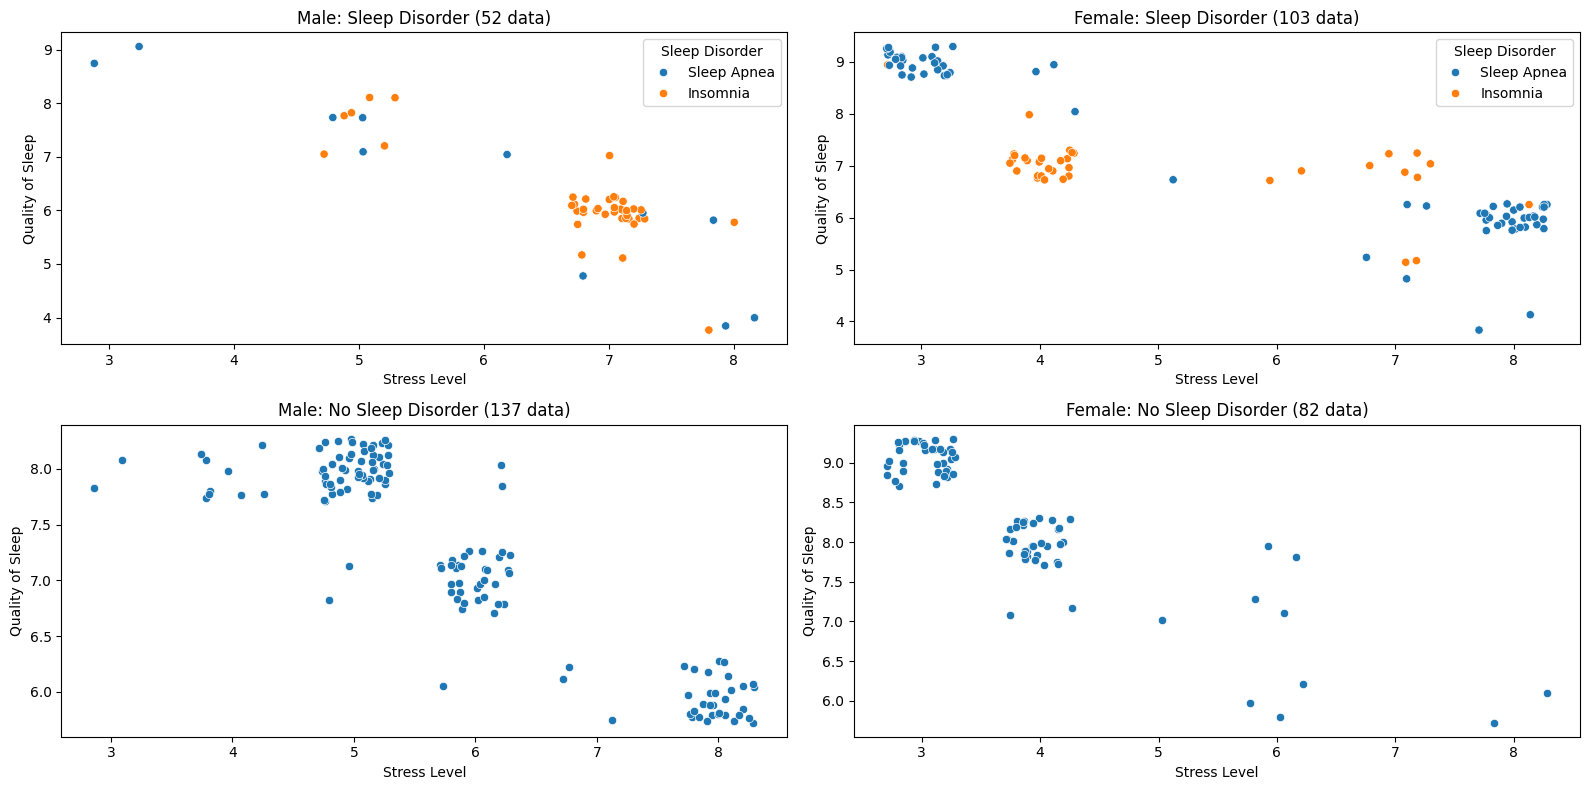

In [3]:
fig = plt.figure(figsize=(16,8))

male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

male_disorder_df = male_df[~male_df['Sleep Disorder'].isnull()]
female_disorder_df = female_df[~female_df['Sleep Disorder'].isnull()]
male_non_disorder_df = male_df[male_df['Sleep Disorder'].isnull()]
female_non_disorder_df = female_df[female_df['Sleep Disorder'].isnull()]

jitter_val = 0.3
male_disorder_df['Quality of Sleep'] = male_disorder_df['Quality of Sleep'] + np.random.uniform(-jitter_val, jitter_val, size=male_disorder_df.shape[0])
female_disorder_df['Quality of Sleep'] = female_disorder_df['Quality of Sleep'] + np.random.uniform(-jitter_val, jitter_val, size=female_disorder_df.shape[0])
male_non_disorder_df['Quality of Sleep'] = male_non_disorder_df['Quality of Sleep'] + np.random.uniform(-jitter_val, jitter_val, size=male_non_disorder_df.shape[0])
female_non_disorder_df['Quality of Sleep'] = female_non_disorder_df['Quality of Sleep'] + np.random.uniform(-jitter_val, jitter_val, size=female_non_disorder_df.shape[0])

male_disorder_df['Stress Level'] = male_disorder_df['Stress Level'] + np.random.uniform(-jitter_val, jitter_val, size=male_disorder_df.shape[0])
female_disorder_df['Stress Level'] = female_disorder_df['Stress Level'] + np.random.uniform(-jitter_val, jitter_val, size=female_disorder_df.shape[0])
male_non_disorder_df['Stress Level'] = male_non_disorder_df['Stress Level'] + np.random.uniform(-jitter_val, jitter_val, size=male_non_disorder_df.shape[0])
female_non_disorder_df['Stress Level'] = female_non_disorder_df['Stress Level'] + np.random.uniform(-jitter_val, jitter_val, size=female_non_disorder_df.shape[0])


# With Sleep Disorder

plt.subplot(2,2,1)
sns.scatterplot(
    data=male_disorder_df,
    x='Stress Level',
    y='Quality of Sleep',
    hue='Sleep Disorder'
)
plt.title(f'Male: Sleep Disorder ({male_disorder_df.shape[0]} data)')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

plt.subplot(2,2,2)
sns.scatterplot(
    data=female_disorder_df,
    x='Stress Level',
    y='Quality of Sleep',
    hue='Sleep Disorder'
)
plt.title(f'Female: Sleep Disorder ({female_disorder_df.shape[0]} data)')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

# Without Sleep Disorder

plt.subplot(2,2,3)
sns.scatterplot(
    data=male_non_disorder_df,
    x='Stress Level',
    y='Quality of Sleep'
)
plt.title(f'Male: No Sleep Disorder ({male_non_disorder_df.shape[0]} data)')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

plt.subplot(2,2,4)
sns.scatterplot(
    data=female_non_disorder_df,
    x='Stress Level',
    y='Quality of Sleep'
)
plt.title(f'Female: No Sleep Disorder ({female_non_disorder_df.shape[0]} data)')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

plt.tight_layout()
plt.show()

### Hasil Visualisasi (Pria)
---

Untuk Pria, kami menemukan bahwa tingkat sleep disorder cenderung berbanding lurus dengan stress level (tingkat stress level yang lebih tinggi = kemungkinan sleep disorder yang lebih tinggi). Hal ini dapat dilihat pada sampel insomnia yang terkonsentrasi pada skala stress level $\ge$ 7 sedangkan tidak ada pola tertentu yang dapat menentukan tingkat sleep apnea.

### Hasil Visualisasi (Wanita)
---

Tidak seperti pria, kami menemukan bahwa tingkat sleep disorder pada wanita dipengaruhi dari tingkat keseimbangan stress. Apabila keseimbangan terganggu (terlalu stress / tidak stress) maka wanita cenderung memiliki sleep disorder. Hal tersebut dapat dilihat dari data sleep disorder pada wanita terkonsentrasi pada stress level $\le$ 4 dan stress level $\ge$ 7.

## 2. Visualisasi Fitur lainnya dalam Dataset
---

Sleep Disorder tentu dipengaruhi oleh faktor faktor lain seperti:
- BMI (Body Mass Index)
- Occupation (Pekerjaan)
- Age (Usia)
- Physical Activity Level (Tingkat aktivitas fisik)
- Sleep Duration (Durasi tidur)

Pengaruh faktor-faktor tersebut dapat divisualisasikan seperti berikut :
- Pengaruh BMI pada Sleep Disorder
- Kaitan Pekerjaan dan Sleep Disorder
- Pengaruh Usia dan Durasi tidur terhadap Sleep Disorder
- Korelasi antara aktivitas fisik dan Sleep Disorder

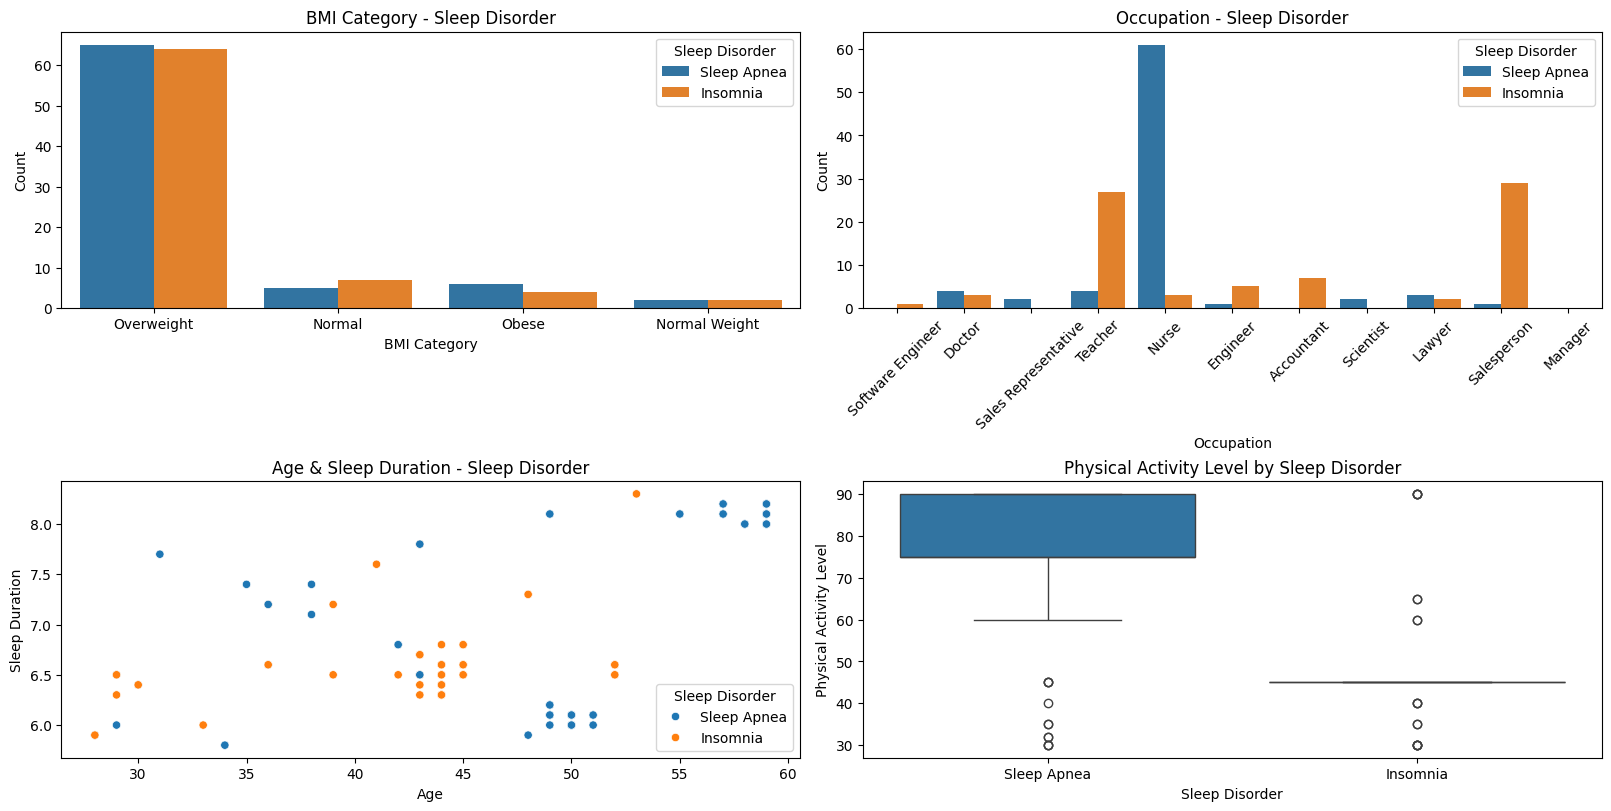

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(16, 8),constrained_layout=True)

plt.subplot(2,2,1)
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder')
plt.title('BMI Category - Sleep Disorder')
plt.xlabel('BMI Category')
plt.ylabel('Count')


plt.subplot(2,2,2)
sns.countplot(data=df, x='Occupation', hue='Sleep Disorder')
plt.title('Occupation - Sleep Disorder')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.scatterplot(data=df, x='Age', y='Sleep Duration', hue='Sleep Disorder')
plt.title('Age & Sleep Duration - Sleep Disorder')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')

plt.subplot(2,2,4)
sns.boxplot(data=df, x='Sleep Disorder', y='Physical Activity Level')
plt.title('Physical Activity Level by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Physical Activity Level')
plt.show()

plt.tight_layout()
plt.show()


### Hasil Visualisasi (BMI)
---

Dapat dilihat pada hasil visualisasi BMI Category, dapat dilihat bahwa persentase data sleep disorder terkonsentrasi pada tingkat BMI Overweight dan sisa disorder terbagi rata antar tingkat BMI lain.

### Hasil Visualisasi (Occupation)
---

Dapat dilihat pada hasil visualisasi Occupation, proporsi Sleep Apnea terkontentasi pada pekerjaan nurse. Selain itu, proporsi Insomnia terkonstrasi pada pekerjaan teacher dan salesperson dan terbagi rata pada pekerjaan lain.

### Hasil Visualisasi (Sleep Duration & Age)
---

Insomnia cenderung muncul pada orang dengan usia 40 - 45 tahun dengan jam tidur 6.5 - 7 jam sedangkan untuk sleep apnea cenderung muncul pada usia > 45 tahun dengan faktor jam tidur yang tidak terlalu mempengaruhi (persebaran merata pada waktu tidur). Hal ini dapat dilihat pada hasil visualisasi Sleep Duration & Age.

### Hasil Visualisasi (Physical Activity Level)
---

Dapat dilihat pada hasil visualisasi Physical Activity Level, rata rata pengidap sleep apnea berada pada tingkat aktivitas fisik 80 - 90 dan rata rata pengidap insomnia terkonsentrasi pada tingkat aktivitas fisik 40 - 50



# Step 3. Data Preprocessing
---

Setelah Visualisasi dengan Matplotlib dan Seaborn dilakukan pada untuk mendeskripsikan Dataset yang digunakan, Data Preprocessing merupakan cara mempersiapkan dataset sebelum proses training model dilakukan.

## 1. Import Library untuk Data Preprocessing
---

Beberapa library python yang digunakan sebagai berikut:

- sklearn.pipeline (Pipeline)
- sklearn.preprocessing (StandardScaler, OneHotEncoder, OrdinalEncoder)
- sklearn.compose (ColumnTransformer)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.compose import ColumnTransformer


## 2. Persiapan data untuk menggunakan Algoritma Data Preprocessing
---

### A. Isi NaN Value dalam Kolom Sleep Disorder

Pengisian kolom bernilai null dalam kolom sleep disorder bertujuan sebagai berikut :

- Untuk menangani missing value sehingga algoritma klasifikasi dapat berjalan dengan baik .

- Ukuran sampel tidak berkurang karena adanya (penanganan dilakukan tidak dengan drop value).

Pengisian kolom dapat dilakukan dengan langkah berikut :

In [6]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Hasil :

Dapat dilihat dalam tabel bahwa sel DataFrame yang sebelumnya bernilai NaN telah diisi dengan kategori "No Disorder" dan data data tersebut akan tetap digunakan dalam proses training model

### B. Mengubah Kolom Blood Pressure menjadi Data Kategori

Data pada Kolom Blood Pressure yang bertipe data string perlu diubah menjadi data numerik agar dapat diaplikasikan sebagai fitur dalam algoritma Klasifikasi yang akan digunakan.

Pengubahan Kolom akan dilakukan sebagai berikut :

In [7]:
def categorize_bp(bp):
    bp = int(bp.split("/")[0])
    if bp < 90:
        return 'Hypotension'
    elif bp <= 120:
        return 'Normal'
    else:
        return 'Hypertension'

df['Blood Pressure Category'] = df['Blood Pressure'].apply(categorize_bp)
df = df.drop(columns=['Blood Pressure'])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,Hypertension
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,Hypertension
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,Hypertension
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Hypertension
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Hypertension


Hasil :

Dapat dilihat bahwa kolom "Blood Pressure" telah berubah menjadi data kategorikal dalam kolom "Blood Pressure Category". Terdapat 3 kategori dalam kolom tersebut dengan nilai tekanan sistolik sebagai tolak ukur kategori tersebut:

- Tekanan sistolik < 90 = Hipotensi (Hypotension)
- Tekanan sistolik 90 - 120 = Normal (Normal)
- Tekanan sistolik > 120 = Hipertensi (Hypertension)


### C. Menyesuaian data BMI 'Normal' dan 'Normal Weight'

Data pada kolom BMI ternyata memiliki sedikit kecacatan yang berpotensi menyebabkan ketidaksesuaian kepada jumlah kategori dalam pengaplikasian Ordinal Encoder dalam proses preprocessing selanjutnya.

Maka dari itu, dilakukan penyesuaian sebagai berikut:


In [8]:
def BMI_fix(bmi_idx):
  if bmi_idx == 'Normal Weight':
    return 'Normal'
  else:
    return bmi_idx

df['BMI Category Fix'] = df['BMI Category'].apply(BMI_fix)
df = df.drop(columns=['BMI Category'])
df['BMI Category'] = df['BMI Category Fix']
df = df.drop(columns=['BMI Category Fix'])

seriess = df['BMI Category'].unique()
if seriess.shape[0] == 3:
  print("BMI Category Fix Success")

df.head()


BMI Category Fix Success


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Category,BMI Category
0,1,Male,27,Software Engineer,6.1,6,42,6,77,4200,No Disorder,Hypertension,Overweight
1,2,Male,28,Doctor,6.2,6,60,8,75,10000,No Disorder,Hypertension,Normal
2,3,Male,28,Doctor,6.2,6,60,8,75,10000,No Disorder,Hypertension,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,Hypertension,Obese
4,5,Male,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,Hypertension,Obese


Hasil :

Dapat dilihat bahwa hanya terdapat 3 kategori saja yang ditunjukkan sebagai hasil dari pengambilan unique value (tanpa duplikat) dari kolom "BMI Category".

Hal tersebut dapat dilihat dari kalimat "BMI Category Fix Success" yang hanya ditampilkan jika ukuran array/series dari unique value tersebut bernilai 3.

## 3. Dataset Preprocessing dengan Algoritma Data Preprocessing
---

Secara umum, Preprocessing dataset akan menggunakan 3 Pipeline masing masing dengan aplikasi algoritma preprocessing untuk mengakomodasi kebutuhan algoritma model training yang akan digunakan kedepannya :

1. KNN (StandardScaler, OneHotEncoder, OrdinalEncoder)
2. Random Forest (OneHotEncoder, OrdinalEncoder)
3. XGBoost (OneHotEncoder, OrdinalEncoder)

### A. KNN Preprocessing

Note :

>Data Preprocessing untuk algoritma KNN memerlukan Standard Scaler karena bekerja dengan memperhitungkan jarak antar titik dalam menentukan hasil klasifikasi sehingga mengubah menstandarisasi data dengan skala berbasis rata-rata dan deviasi standar menjadi suatu hal yang diperlukan dalam proses klasifikasi dengan data berdimensi tinggi.

Data Preprocessing untuk KNN dapat dilihat sebagai berikut :

In [9]:
numeric_cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Quality of Sleep', 'Daily Steps', 'Heart Rate']
ohe_cols = ['Gender', 'Occupation']
ordinal_cols = ['BMI Category', 'Blood Pressure Category']

knn_pipeline = Pipeline([
    ('knn_preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_cols),
        ('ohe', OneHotEncoder(), ohe_cols),
        ('ordinal', OrdinalEncoder(categories=[['Normal', 'Overweight', 'Obese'],['Hypotension', 'Normal', 'Hypertension']]), ordinal_cols)
    ]))
])

# transformasi df dalam array knn
knn_arr = knn_pipeline.fit_transform(df)

# Pengambilan nama fitur untuk pengubahan array knn menjadi bentuk dataframe.
# named_steps, named_transformers = properti dari array hasil knn_pipeline (bukan sebuah method).
ohe_feature_names = knn_pipeline.named_steps['knn_preprocessor'].named_transformers_['ohe'].get_feature_names_out(ohe_cols)
ordinal_feature_names = knn_pipeline.named_steps['knn_preprocessor'].named_transformers_['ordinal'].get_feature_names_out(ordinal_cols)
feature_names = numeric_cols + list(ohe_feature_names) + list(ordinal_feature_names)

# transformasi array knn menjadi bentuk dataframe dengan nama kolom yang telah diambil.
knn_df = pd.DataFrame(knn_arr, columns=feature_names)
number_of_samples, number_of_features = knn_df.shape

print(f"Number of samples : {number_of_samples}")
print(f"Current number of features : {number_of_features}")

knn_df.head()


Number of samples : 374
Current number of features : 22


,Age,Sleep Duration,Physical Activity Level,Stress Level,Quality of Sleep,Daily Steps,Heart Rate,Gender_Female,Gender_Male,Occupation_Accountant,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category,Blood Pressure Category
0,-1.753096,-1.298887,-0.825418,0.347021,-1.098280,-1.619584,1.654719,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
1,-1.637643,-1.173036,0.039844,1.475592,-1.098280,1.970077,1.170474,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,-1.637643,-1.173036,0.039844,1.475592,-1.098280,1.970077,1.170474,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,-1.637643,-1.550588,-1.402260,1.475592,-2.771424,-2.362273,3.591698,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
4,-1.637643,-1.550588,-1.402260,1.475592,-2.771424,-2.362273,3.591698,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0


## B. Random Forest Preprocessing

Note :

>Tidak sama seperti KNN, data preprocessing pada algoritma berbasis tree seperti Random Forest & XGBoost tidak memerlukan implementasi Standard scaler dalam data numeric. Hal tersebut disebabkan karena cara kerja algoritma yang berbasis decision tree (bukan jarak antar titik).

Data Preprocessing untuk Random Forest dapat dilihat sebagai berikut :

In [10]:
numeric_cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Quality of Sleep', 'Daily Steps', 'Heart Rate']
ohe_cols = ['Gender', 'Occupation']
ordinal_cols = ['BMI Category', 'Blood Pressure Category']

rf_pipeline = Pipeline([
    ('rf_preprocessor', ColumnTransformer([
        ('scaler', 'passthrough', numeric_cols),
        ('ohe', OneHotEncoder(), ohe_cols),
        ('ordinal', OrdinalEncoder(categories=[['Normal', 'Overweight', 'Obese'],['Hypotension', 'Normal', 'Hypertension']]), ordinal_cols)
    ]))
])

# transformasi df dalam array rf
rf_arr = rf_pipeline.fit_transform(df)

# Pengambilan nama fitur untuk pengubahan array rf menjadi bentuk dataframe.
# named_steps, named_transformers = properti dari array hasil rf_pipeline (bukan sebuah method).
ohe_feature_names = rf_pipeline.named_steps['rf_preprocessor'].named_transformers_['ohe'].get_feature_names_out(ohe_cols)
ordinal_feature_names = rf_pipeline.named_steps['rf_preprocessor'].named_transformers_['ordinal'].get_feature_names_out(ordinal_cols)
feature_names = numeric_cols + list(ohe_feature_names) + list(ordinal_feature_names)

# transformasi array rf menjadi bentuk dataframe dengan nama kolom yang telah diambil.
rf_df = pd.DataFrame(rf_arr, columns=feature_names)
number_of_samples, number_of_features = rf_df.shape

print(f"Number of samples : {number_of_samples}")
print(f"Current number of features : {number_of_features}")

rf_df.head()

Number of samples : 374
Current number of features : 22


,Age,Sleep Duration,Physical Activity Level,Stress Level,Quality of Sleep,Daily Steps,Heart Rate,Gender_Female,Gender_Male,Occupation_Accountant,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category,Blood Pressure Category
0,27.0,6.1,42.0,6.0,6.0,4200.0,77.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
1,28.0,6.2,60.0,8.0,6.0,10000.0,75.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,28.0,6.2,60.0,8.0,6.0,10000.0,75.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,28.0,5.9,30.0,8.0,4.0,3000.0,85.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
4,28.0,5.9,30.0,8.0,4.0,3000.0,85.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0


## C. XGBoost Preprocessing

Note :

>Meskipun Ordinal Encoder menyatakan suatu tingkatan (order), XGBoost dan model berbasis tree lainnya tidak peduli dengan besaran atau urutan angka-angka tersebut. Algoritma berbasis tree hanya menggunakan angka untuk membagi kelompok data — bukan untuk menghitung jarak seperti SVM dengan kernel linear atau KNN.

>Sebagai implikasi, menggunakan Ordinal Encoder untuk membagi data aman digunakan dalam training dengan algoritma XGBoost dan memiliki efisiensi training yang lebih baik dibandingkan OHE yang menyebabkan data memiliki dimensi yang lebih tinggi.

>Namun, kami tetap menggunakan OHE pada preprocessing data XGBoost untuk menghindari interpretasi atau asumsi yang tidak benar mengenai data.

Data Preprocessing untuk XGBoost dapat dilihat sebagai berikut :

In [11]:
numeric_cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Quality of Sleep', 'Daily Steps', 'Heart Rate']
ohe_cols = ['Gender', 'Occupation']
ordinal_cols = ['BMI Category', 'Blood Pressure Category', 'Sleep Disorder']

categorical_cols = ohe_cols + ordinal_cols

xgboost_pipeline = Pipeline([
    ('xgboost_preprocessor', ColumnTransformer([
        ('scaler', 'passthrough', numeric_cols),
        ('ohe', OneHotEncoder(), ohe_cols),
        ('ordinal', OrdinalEncoder(categories=[['Normal', 'Overweight', 'Obese'],['Hypotension', 'Normal', 'Hypertension'], ['No Disorder', 'Sleep Apnea', 'Insomnia']]), ordinal_cols)
    ])),
])

# transformasi df dalam array xgboost
xgboost_arr = xgboost_pipeline.fit_transform(df)

# Pengambilan nama fitur untuk pengubahan array xgboost menjadi bentuk dataframe.
# named_steps, named_transformers = properti dari array hasil xgboost_pipeline (bukan sebuah method).
ohe_feature_names = xgboost_pipeline.named_steps['xgboost_preprocessor'].named_transformers_['ohe'].get_feature_names_out(ohe_cols)
ordinal_feature_names = xgboost_pipeline.named_steps['xgboost_preprocessor'].named_transformers_['ordinal'].get_feature_names_out(ordinal_cols)
feature_names = numeric_cols + list(ohe_feature_names) + list(ordinal_feature_names)

# transformasi array xgboost menjadi bentuk dataframe dengan nama kolom yang telah diambil.
xgboost_df = pd.DataFrame(xgboost_arr, columns=feature_names)
number_of_samples, number_of_features = xgboost_df.shape

print(f"Number of samples : {number_of_samples}")
print(f"Current number of features : {number_of_features}")

xgboost_df.head()

Number of samples : 374
Current number of features : 23


,Age,Sleep Duration,Physical Activity Level,Stress Level,Quality of Sleep,Daily Steps,Heart Rate,Gender_Female,Gender_Male,Occupation_Accountant,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category,Blood Pressure Category,Sleep Disorder
0,27.0,6.1,42.0,6.0,6.0,4200.0,77.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
1,28.0,6.2,60.0,8.0,6.0,10000.0,75.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,28.0,6.2,60.0,8.0,6.0,10000.0,75.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,28.0,5.9,30.0,8.0,4.0,3000.0,85.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
4,28.0,5.9,30.0,8.0,4.0,3000.0,85.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0


## 4. Menggabungkan hasil preprocessing dataset dengan hasil Klasifikasi
---

Dapat dilihat bahwa pada dataframe hasil preprocessing diatas tidak memiliki hasil klasifikasi berupa kolom Sleep Disoder didalamnya.

Maka, langkah ini bertujuan untuk menyelesaikan preprocessing dataset dengan menambahkan kolom Sleep Disorder dalam dataframe sehingga dapat melalui proses training selanjutnya dengan baik.

Penambahan kolom dapat dilihat sebagai berikut:

In [12]:
knn_df = pd.concat([knn_df, df['Sleep Disorder']], axis=1)
rf_df = pd.concat([rf_df, df['Sleep Disorder']], axis=1)


# Step 4. Model Training & Tuning
---

Setalah melakukan preprocessing data, data sekarang telah siap untuk digunakan dalam proses training melalui algoritma yang telah disebutkan sebelumnya.

Algoritma yang akan digunakan yaitu :
1. K-Nearest Neighbor
2. Random Forest
3. XGBoost

Library yang akan digunakan untuk mendukung proses model training adalah sebagai berikut :

1. sklearn.model_selection
  - train_test_split (membagi dataset menjadi data train & test)
  - KFold (menerapkan k-fold cross validation)
  - StratifiedKFold (menerapkan stratified k-fold cross validation)
  - cross_val_score (untuk mengimplementasikan skf dan kf)
  - cross_val_predict
  - GridSearchCV

2. sklearn.metrics
  - accuracy_score
  - confusion_matrix
  - classification_report

## 1. Train test split
---

Sebelum melakukan training model, dataset akan dibagi menjadi data training dan data testing dengan rasio 80% train & 20% test.

Proses train test split dapat dilihat sebagai berikut:

In [13]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_df_x = knn_df.drop(columns=['Sleep Disorder'])
knn_df_y = knn_df['Sleep Disorder']

rf_df_x = rf_df.drop(columns=['Sleep Disorder'])
rf_df_y = rf_df['Sleep Disorder']

xgboost_df_x = xgboost_df.drop(columns=['Sleep Disorder'])
xgboost_df_y = xgboost_df['Sleep Disorder']


knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_df_x, knn_df_y, test_size=0.2, random_state=42)
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_df_x, rf_df_y, test_size=0.2, random_state=42)
xgboost_X_train, xgboost_X_test, xgboost_y_train, xgboost_y_test = train_test_split(xgboost_df_x, xgboost_df_y, test_size=0.2, random_state=42)



## 2. Training Model
---

Proses training akan dijalankan dalam 3 tahap untuk masing masing model yaitu:

1. Menentukan Hyperparameter terbaik dengan Grid Search
2. Evaluasi & Validasi model dengan 3 jenis validasi:

    - Normal Validation
    - K-Fold Cross Validation
    - Stratified K-Fold Cross Validation

>Grid Search = Metode / Fungsi yang digunakan untuk optimisasi parameter (mencari parameter terbaik berdasarkan algoritma dan dataset yang digunakan) sebelum mengimplementasikan sebuah algoritma dalam proses training pada dataset.

>K-Fold Cross Validation = Metode untuk memvalidasi hasil klasifikasi dengan mengambil subset lain dari dataset sebagai test data dengan proporsi train : test yang sama.

>Stratified K-Fold Cross Validation = Merupakan bentuk lain dari algoritma K-Fold dengan perbedaan pada metode pengambilan subset dalam melakukan validasi. Dalam K-Fold, dataset diambil per-instance dengan semua fitur yang dimiliki. Namun dalam Stratified K-Fold, test set diambil secara seimbang dari berbagai fitur yang dimiliki.




### A. KNN Model
---
Berikut parameter yang kami pertimbangkan untuk mencari parameter K-Nearest Neighbour yang terbaik:

In [14]:
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


Training dengan model KNN dapat dilihat sebagai berikut:

### 1. Normal

In [15]:
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(knn_X_train, knn_y_train)
best_knn_model = grid_search_knn.best_estimator_

n_neighbors = best_knn_model.n_neighbors
weights = best_knn_model.weights
metric = best_knn_model.metric

print(f"""
Best KNN's Parameter:
1. n_neighbors -> {n_neighbors}
2. weights -> {weights}
3. metric -> {metric}
""")

knn_prediction = grid_search_knn.predict(knn_X_test)

print("Normal validation : \n")
accuracy = accuracy_score(y_true=knn_y_test, y_pred=knn_prediction)
conf_matrix = confusion_matrix(y_true=knn_y_test, y_pred=knn_prediction)
classification_rep = classification_report(y_true=knn_y_test, y_pred=knn_prediction)
print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n {conf_matrix}")
print(f"Classification Report : \n {classification_rep}")


Best KNN's Parameter:
1. n_neighbors -> 7
2. weights -> uniform
3. metric -> manhattan

Normal validation : 

Accuracy : 0.8533333333333334
Confusion Matrix : 
 [[13  1  2]
 [ 3 40  0]
 [ 3  2 11]]
Classification Report : 
               precision    recall  f1-score   support

    Insomnia       0.68      0.81      0.74        16
 No Disorder       0.93      0.93      0.93        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.85        75
   macro avg       0.82      0.81      0.81        75
weighted avg       0.86      0.85      0.85        75



### 2. K-Fold Cross Validation

In [16]:
grid_search_knn_kfold = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn_kfold.fit(knn_X_train, knn_y_train)
best_knn_model = grid_search_knn_kfold.best_estimator_

n_neighbors = best_knn_model.n_neighbors
weights = best_knn_model.weights
metric = best_knn_model.metric

print(f"""
Best KNN's Parameter:
1. n_neighbors -> {n_neighbors}
2. weights -> {weights}
3. metric -> {metric}
""")

kfold_knn_prediction = grid_search_knn_kfold.predict(knn_X_test)

print("K-Fold cross validation : \n")
accuracy = accuracy_score(y_true=knn_y_test, y_pred=kfold_knn_prediction)
conf_matrix = confusion_matrix(y_true=knn_y_test, y_pred=kfold_knn_prediction)
classification_rep = classification_report(y_true=knn_y_test, y_pred=kfold_knn_prediction)
print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n {conf_matrix}")
print(f"Classification Report : \n {classification_rep}")


Best KNN's Parameter:
1. n_neighbors -> 7
2. weights -> uniform
3. metric -> manhattan

K-Fold cross validation : 

Accuracy : 0.8533333333333334
Confusion Matrix : 
 [[13  1  2]
 [ 3 40  0]
 [ 3  2 11]]
Classification Report : 
               precision    recall  f1-score   support

    Insomnia       0.68      0.81      0.74        16
 No Disorder       0.93      0.93      0.93        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.85        75
   macro avg       0.82      0.81      0.81        75
weighted avg       0.86      0.85      0.85        75



### 3. Stratified K-Fold Cross Validation

In [17]:
grid_search_knn_skfold = GridSearchCV(estimator=knn, param_grid=param_grid, cv=skf ,scoring='accuracy', n_jobs=-1)
grid_search_knn_skfold.fit(knn_X_train, knn_y_train)
best_knn_model = grid_search_knn_skfold.best_estimator_

n_neighbors = best_knn_model.n_neighbors
weights = best_knn_model.weights
metric = best_knn_model.metric

print(f"""
Best KNN's Parameter:
1. n_neighbors -> {n_neighbors}
2. weights -> {weights}
3. metric -> {metric}
""")


skfold_knn_prediction = grid_search_knn_skfold.predict(knn_X_test)

print("Stratified K-Fold cross validation : \n")
accuracy = accuracy_score(y_true=knn_y_test, y_pred=skfold_knn_prediction)
conf_matrix = confusion_matrix(y_true=knn_y_test, y_pred=skfold_knn_prediction)
classification_rep = classification_report(y_true=knn_y_test, y_pred=skfold_knn_prediction)
print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n {conf_matrix}")
print(f"Classification Report : \n {classification_rep}")


Best KNN's Parameter:
1. n_neighbors -> 3
2. weights -> uniform
3. metric -> manhattan

Stratified K-Fold cross validation : 

Accuracy : 0.8533333333333334
Confusion Matrix : 
 [[13  1  2]
 [ 3 40  0]
 [ 4  1 11]]
Classification Report : 
               precision    recall  f1-score   support

    Insomnia       0.65      0.81      0.72        16
 No Disorder       0.95      0.93      0.94        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.85        75
   macro avg       0.82      0.81      0.81        75
weighted avg       0.87      0.85      0.86        75



Hasil Klasifikasi KNN :
---

Akurasi klasifikasi yang sama terlihat pada hasil pada Normal training dan 2 jenis validasi yaitu sebesar 85,33%. Namun perbedaan dapat terlihat antara hasil penggunaan K-fold dan Stratified K-fold, terutama dibagian **hyperparameter dan Classification Report**.

Hyperparameter terbaik dalam melakukan training dengan algoritma KNN dengan dataset yang dimiliki telah dihasilkan melalui proses Grid Search.

Parameter terbaik untuk Normal validation & K-Fold :

- n_neighbors -> 7
- weights -> uniform
- metric -> manhattan

Parameter terbaik untuk Stratified K-Fold :

- n_neighbors -> 3
- weights -> uniform
- metric -> manhattan





### B. Random Forest Model
---

Berikut parameter yang kami pertimbangkan untuk mencari parameter Random Forest yang terbaik:

In [18]:
rf = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

Training dengan model Random Forest dapat dilihat sebagai berikut:

### 1. Normal

In [19]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(rf_X_train, rf_y_train)

best_rf_model = grid_search_rf.best_estimator_

n_estimators = best_rf_model.n_estimators
max_depth = best_rf_model.max_depth
min_samples_split = best_rf_model.min_samples_split
min_samples_leaf = best_rf_model.min_samples_leaf
max_features = best_rf_model.max_features
criterion = best_rf_model.criterion

print(f"""
Best Random Forest's Parameter:
1. n_estimators -> {n_estimators}
2. max_depth -> {max_depth}
3. min_samples_split -> {min_samples_split}
4. min_samples_leaf -> {min_samples_leaf}
5. max_features -> {max_features}
6. criterion -> {criterion}
""")

rf_prediction = grid_search_rf.predict(rf_X_test)

print("Normal validation : \n")
accuracy = accuracy_score(y_true=rf_y_test, y_pred=rf_prediction)
conf_matrix = confusion_matrix(y_true=rf_y_test, y_pred=rf_prediction)
classification_rep = classification_report(y_true=rf_y_test, y_pred=rf_prediction)
print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n {conf_matrix}")
print(f"Classification Report : \n {classification_rep}")


Best Random Forest's Parameter:
1. n_estimators -> 100
2. max_depth -> None
3. min_samples_split -> 2
4. min_samples_leaf -> 2
5. max_features -> sqrt
6. criterion -> gini

Normal validation : 

Accuracy : 0.88
Confusion Matrix : 
 [[13  1  2]
 [ 1 42  0]
 [ 2  3 11]]
Classification Report : 
               precision    recall  f1-score   support

    Insomnia       0.81      0.81      0.81        16
 No Disorder       0.91      0.98      0.94        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75



### 2. K-Fold Cross Validation

In [20]:
grid_search_rf_kfold = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf_kfold.fit(rf_X_train, rf_y_train)

best_rf_model = grid_search_rf_kfold.best_estimator_

n_estimators = best_rf_model.n_estimators
max_depth = best_rf_model.max_depth
min_samples_split = best_rf_model.min_samples_split
min_samples_leaf = best_rf_model.min_samples_leaf
max_features = best_rf_model.max_features
criterion = best_rf_model.criterion

print(f"""
Best Random Forest's Parameter:
1. n_estimators -> {n_estimators}
2. max_depth -> {max_depth}
3. min_samples_split -> {min_samples_split}
4. min_samples_leaf -> {min_samples_leaf}
5. max_features -> {max_features}
6. criterion -> {criterion}
""")

kfold_rf_prediction = grid_search_rf_kfold.predict(rf_X_test)

print("K-Fold validation : \n")
accuracy = accuracy_score(y_true=rf_y_test, y_pred=kfold_rf_prediction)
conf_matrix = confusion_matrix(y_true=rf_y_test, y_pred=kfold_rf_prediction)
classification_rep = classification_report(y_true=rf_y_test, y_pred=kfold_rf_prediction)
print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n {conf_matrix}")
print(f"Classification Report : \n {classification_rep}")


Best Random Forest's Parameter:
1. n_estimators -> 100
2. max_depth -> None
3. min_samples_split -> 2
4. min_samples_leaf -> 2
5. max_features -> sqrt
6. criterion -> gini

K-Fold validation : 

Accuracy : 0.88
Confusion Matrix : 
 [[13  1  2]
 [ 1 42  0]
 [ 2  3 11]]
Classification Report : 
               precision    recall  f1-score   support

    Insomnia       0.81      0.81      0.81        16
 No Disorder       0.91      0.98      0.94        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75



### 3. Stratified K-Fold Cross Validation

In [21]:
grid_search_rf_skfold = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
grid_search_rf_skfold.fit(rf_X_train, rf_y_train)

best_rf_model = grid_search_rf_skfold.best_estimator_

n_estimators = best_rf_model.n_estimators
max_depth = best_rf_model.max_depth
min_samples_split = best_rf_model.min_samples_split
min_samples_leaf = best_rf_model.min_samples_leaf
max_features = best_rf_model.max_features
criterion = best_rf_model.criterion

print(f"""
Best Random Forest's Parameter:
1. n_estimators -> {n_estimators}
2. max_depth -> {max_depth}
3. min_samples_split -> {min_samples_split}
4. min_samples_leaf -> {min_samples_leaf}
5. max_features -> {max_features}
6. criterion -> {criterion}
""")

skfold_rf_prediction = grid_search_rf_skfold.predict(rf_X_test)

print("Stratified K-Fold validation : \n")
accuracy = accuracy_score(y_true=rf_y_test, y_pred=skfold_rf_prediction)
conf_matrix = confusion_matrix(y_true=rf_y_test, y_pred=skfold_rf_prediction)
classification_rep = classification_report(y_true=rf_y_test, y_pred=skfold_rf_prediction)
print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n {conf_matrix}")
print(f"Classification Report : \n {classification_rep}")


Best Random Forest's Parameter:
1. n_estimators -> 100
2. max_depth -> 10
3. min_samples_split -> 5
4. min_samples_leaf -> 1
5. max_features -> sqrt
6. criterion -> gini

Stratified K-Fold validation : 

Accuracy : 0.88
Confusion Matrix : 
 [[13  1  2]
 [ 1 42  0]
 [ 2  3 11]]
Classification Report : 
               precision    recall  f1-score   support

    Insomnia       0.81      0.81      0.81        16
 No Disorder       0.91      0.98      0.94        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75



### C. XGBoost Model
---





Berikut parameter yang kami pertimbangkan untuk mencari parameter xgboost yang terbaik:

In [22]:
xgboost = XGBClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

Training dengan model XGBoost dapat dilihat sebagai berikut:

### 1. Normal Validation

In [23]:
grid_search_xgboost = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search_xgboost.fit(xgboost_X_train, xgboost_y_train)

best_xgboost_model = grid_search_xgboost.best_estimator_

n_estimators = best_xgboost_model.n_estimators
max_depth = best_xgboost_model.max_depth
learning_rate = best_xgboost_model.learning_rate


xgboost_prediction = grid_search_xgboost.predict(xgboost_X_test)

print("Normal validation : \n")
accuracy = accuracy_score(y_true=xgboost_y_test, y_pred=xgboost_prediction)
conf_matrix = confusion_matrix(y_true=xgboost_y_test, y_pred=xgboost_prediction)
classification_rep = classification_report(y_true=xgboost_y_test, y_pred=xgboost_prediction)
print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n {conf_matrix}")
print(f"Classification Report : \n {classification_rep}")

Normal validation : 

Accuracy : 0.88
Confusion Matrix : 
 [[42  0  1]
 [ 3 11  2]
 [ 1  2 13]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        43
         1.0       0.85      0.69      0.76        16
         2.0       0.81      0.81      0.81        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75



### 2. K-Fold Cross Validation

In [24]:
xgboost = XGBClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgboost_kfold = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_xgboost_kfold.fit(xgboost_X_train, xgboost_y_train)

best_xgboost_model = grid_search_xgboost_kfold.best_estimator_

n_estimators = best_xgboost_model.n_estimators
max_depth = best_xgboost_model.max_depth
learning_rate = best_xgboost_model.learning_rate


kfold_xgboost_prediction = grid_search_xgboost_kfold.predict(xgboost_X_test)

print("K-Fold validation : \n")
accuracy = accuracy_score(y_true=xgboost_y_test, y_pred=kfold_xgboost_prediction)
conf_matrix = confusion_matrix(y_true=xgboost_y_test, y_pred=kfold_xgboost_prediction)
classification_rep = classification_report(y_true=xgboost_y_test, y_pred=kfold_xgboost_prediction)
print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n {conf_matrix}")
print(f"Classification Report : \n {classification_rep}")

K-Fold validation : 

Accuracy : 0.88
Confusion Matrix : 
 [[42  0  1]
 [ 1 11  4]
 [ 1  2 13]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97        43
         1.0       0.85      0.69      0.76        16
         2.0       0.72      0.81      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



### 3. Stratified K-Fold Cross Validation

In [25]:
grid_search_xgboost_skfold = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
grid_search_xgboost_skfold.fit(xgboost_X_train, xgboost_y_train)

best_xgboost_model = grid_search_xgboost_skfold.best_estimator_

n_estimators = best_xgboost_model.n_estimators
max_depth = best_xgboost_model.max_depth
learning_rate = best_xgboost_model.learning_rate


skfold_xgboost_prediction = grid_search_xgboost_skfold.predict(xgboost_X_test)

print("Stratified K-Fold validation : \n")
accuracy = accuracy_score(y_true=xgboost_y_test, y_pred=skfold_xgboost_prediction)
conf_matrix = confusion_matrix(y_true=xgboost_y_test, y_pred=skfold_xgboost_prediction)
classification_rep = classification_report(y_true=xgboost_y_test, y_pred=skfold_xgboost_prediction)
print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n {conf_matrix}")
print(f"Classification Report : \n {classification_rep}")

Stratified K-Fold validation : 

Accuracy : 0.8933333333333333
Confusion Matrix : 
 [[42  0  1]
 [ 2 12  2]
 [ 1  2 13]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        43
         1.0       0.86      0.75      0.80        16
         2.0       0.81      0.81      0.81        16

    accuracy                           0.89        75
   macro avg       0.87      0.85      0.86        75
weighted avg       0.89      0.89      0.89        75



## 3. Cross Validation Score & Prediction
---

Bagian ini menggunakan K-Fold cross validation dan Stratified K-Fold untuk generalisasi testing dengan asumsi ketiadaan test set dalam melakukan training model.

Penggunaan Cross Validation Predict juga mempersiapkan metrics evaluasi sebelum dilanjutkan ke bagian evaluasi kinerja model dalam training dataset yang dimiliki.




###KNN

#### K-Fold

K-Fold Cross Val Score (Accuracy): [0.85333333 0.82666667 0.82666667 0.85333333 0.89189189]
K-Fold Mean Accuracy: 0.8503783783783785
K-Fold Confusion Matrix:
[[ 63   7   7]
 [ 19 193   7]
 [  9   7  62]]
K-Fold Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.69      0.82      0.75        77
 No Disorder       0.93      0.88      0.91       219
 Sleep Apnea       0.82      0.79      0.81        78

    accuracy                           0.85       374
   macro avg       0.81      0.83      0.82       374
weighted avg       0.86      0.85      0.85       374



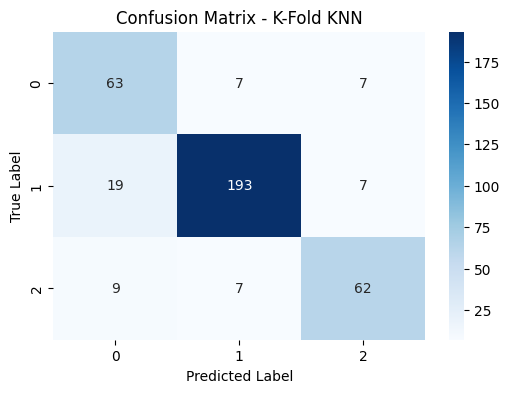

In [26]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_kfold_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

# Cross Val Score (Accuracy)
kfold_scores = cross_val_score(knn_kfold_model, knn_df_x, knn_df_y, cv=kf, scoring='accuracy')
print("K-Fold Cross Val Score (Accuracy):", kfold_scores)
print("K-Fold Mean Accuracy:", kfold_scores.mean())

# Cross Val Predict
knn_kfold_preds = cross_val_predict(knn_kfold_model, knn_df_x, knn_df_y, cv=kf)

# Evaluation
print("K-Fold Confusion Matrix:")
print(confusion_matrix(knn_df_y, knn_kfold_preds))
print("K-Fold Classification Report:")
print(classification_report(knn_df_y, knn_kfold_preds))

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(knn_df_y, knn_kfold_preds), annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - K-Fold KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### SK-Fold

Stratified K-Fold Cross Val Score (Accuracy): [0.89333333 0.92       0.84       0.8        0.87837838]
Stratified K-Fold Mean Accuracy: 0.8663423423423422
Stratified K-Fold Confusion Matrix:
[[ 65   7   5]
 [ 16 198   5]
 [ 10   7  61]]
Stratified K-Fold Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.71      0.84      0.77        77
 No Disorder       0.93      0.90      0.92       219
 Sleep Apnea       0.86      0.78      0.82        78

    accuracy                           0.87       374
   macro avg       0.84      0.84      0.84       374
weighted avg       0.87      0.87      0.87       374



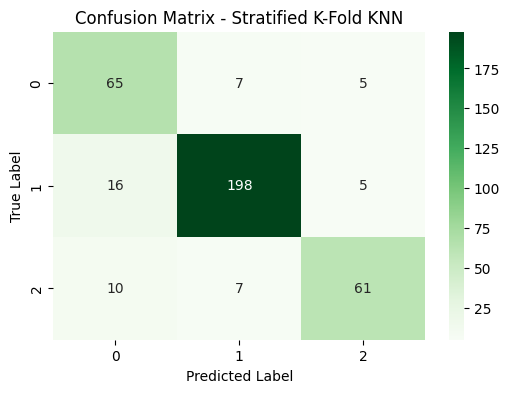

In [27]:
from sklearn.model_selection import StratifiedKFold

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_skfold_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

# Cross Val Score (Accuracy)
skfold_scores = cross_val_score(knn_skfold_model, knn_df_x, knn_df_y, cv=skf, scoring='accuracy')
print("Stratified K-Fold Cross Val Score (Accuracy):", skfold_scores)
print("Stratified K-Fold Mean Accuracy:", skfold_scores.mean())

# Cross Val Predict
knn_skfold_preds = cross_val_predict(knn_skfold_model, knn_df_x, knn_df_y, cv=skf)

# Evaluation
print("Stratified K-Fold Confusion Matrix:")
print(confusion_matrix(knn_df_y, knn_skfold_preds))
print("Stratified K-Fold Classification Report:")
print(classification_report(knn_df_y, knn_skfold_preds))

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(knn_df_y, knn_skfold_preds), annot=True, cmap="Greens", fmt='g')
plt.title("Confusion Matrix - Stratified K-Fold KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###Random Forest

#### K-Fold

Random Forest - K-Fold CV Scores: [0.88       0.90666667 0.88       0.97333333 0.90540541]
Mean Accuracy (K-Fold): 0.909081081081081
Confusion Matrix (K-Fold):
[[ 64   7   6]
 [  4 210   5]
 [  5   7  66]]
Classification Report (K-Fold):
              precision    recall  f1-score   support

    Insomnia       0.88      0.83      0.85        77
 No Disorder       0.94      0.96      0.95       219
 Sleep Apnea       0.86      0.85      0.85        78

    accuracy                           0.91       374
   macro avg       0.89      0.88      0.88       374
weighted avg       0.91      0.91      0.91       374



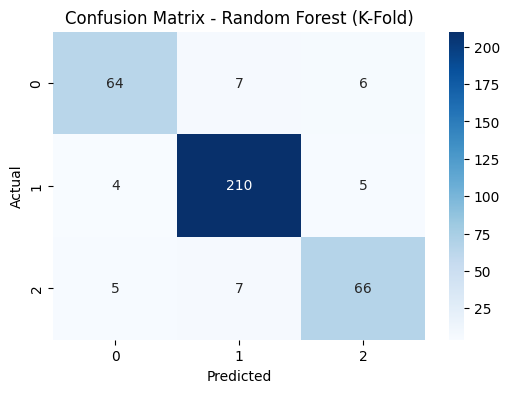

In [28]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross Val Score (K-Fold)
kfold_scores_rf = cross_val_score(best_rf_model, rf_df_x, rf_df_y, cv=kf, scoring='accuracy')
print("Random Forest - K-Fold CV Scores:", kfold_scores_rf)
print("Mean Accuracy (K-Fold):", kfold_scores_rf.mean())

# Cross Val Predict (K-Fold)
kfold_preds_rf = cross_val_predict(best_rf_model, rf_df_x, rf_df_y, cv=kf)

# Evaluation
print("Confusion Matrix (K-Fold):")
print(confusion_matrix(rf_df_y, kfold_preds_rf))
print("Classification Report (K-Fold):")
print(classification_report(rf_df_y, kfold_preds_rf))

# Visualisasi
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(rf_df_y, kfold_preds_rf), annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - Random Forest (K-Fold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### SK-Fold

Random Forest - Stratified K-Fold CV Scores: [0.94666667 0.93333333 0.89333333 0.85333333 0.90540541]
Mean Accuracy (Stratified K-Fold): 0.9064144144144144
Confusion Matrix (Stratified K-Fold):
[[ 64   7   6]
 [  7 206   6]
 [  4   5  69]]
Classification Report (Stratified K-Fold):
              precision    recall  f1-score   support

    Insomnia       0.85      0.83      0.84        77
 No Disorder       0.94      0.94      0.94       219
 Sleep Apnea       0.85      0.88      0.87        78

    accuracy                           0.91       374
   macro avg       0.88      0.89      0.88       374
weighted avg       0.91      0.91      0.91       374



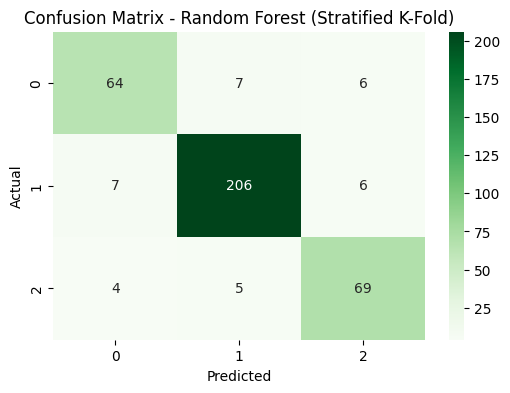

In [29]:
from sklearn.model_selection import StratifiedKFold

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross Val Score (Stratified K-Fold)
skfold_scores_rf = cross_val_score(best_rf_model, rf_df_x, rf_df_y, cv=skf, scoring='accuracy')
print("Random Forest - Stratified K-Fold CV Scores:", skfold_scores_rf)
print("Mean Accuracy (Stratified K-Fold):", skfold_scores_rf.mean())

# Cross Val Predict (Stratified K-Fold)
skfold_preds_rf = cross_val_predict(best_rf_model, rf_df_x, rf_df_y, cv=skf)

# Evaluation
print("Confusion Matrix (Stratified K-Fold):")
print(confusion_matrix(rf_df_y, skfold_preds_rf))
print("Classification Report (Stratified K-Fold):")
print(classification_report(rf_df_y, skfold_preds_rf))

# Visualisasi
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(rf_df_y, skfold_preds_rf), annot=True, cmap="Greens", fmt='g')
plt.title("Confusion Matrix - Random Forest (Stratified K-Fold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###XGBoost

#### K-Fold

XGBoost - K-Fold CV Scores: [0.89333333 0.86666667 0.86666667 0.96       0.89189189]
Mean Accuracy (K-Fold): 0.8957117117117118
Confusion Matrix (K-Fold):
[[205   6   8]
 [  6  67   5]
 [  7   7  63]]
Classification Report (K-Fold):
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       219
         1.0       0.84      0.86      0.85        78
         2.0       0.83      0.82      0.82        77

    accuracy                           0.90       374
   macro avg       0.87      0.87      0.87       374
weighted avg       0.90      0.90      0.90       374



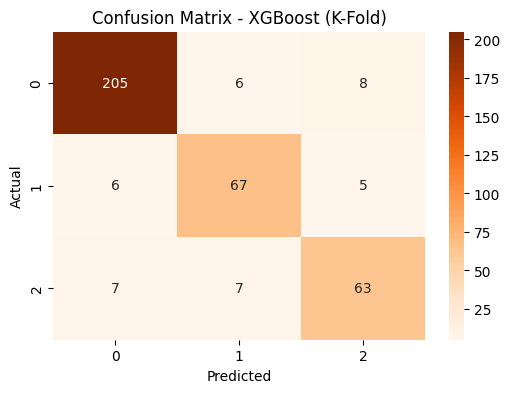

In [30]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation Score
kfold_scores_xgb = cross_val_score(best_xgboost_model, xgboost_df_x, xgboost_df_y, cv=kf, scoring='accuracy')
print("XGBoost - K-Fold CV Scores:", kfold_scores_xgb)
print("Mean Accuracy (K-Fold):", kfold_scores_xgb.mean())

# Cross-validation Predict
kfold_preds_xgb = cross_val_predict(best_xgboost_model, xgboost_df_x, xgboost_df_y, cv=kf)

# Evaluation
print("Confusion Matrix (K-Fold):")
print(confusion_matrix(xgboost_df_y, kfold_preds_xgb))
print("Classification Report (K-Fold):")
print(classification_report(xgboost_df_y, kfold_preds_xgb))

# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(xgboost_df_y, kfold_preds_xgb), annot=True, cmap="Oranges", fmt='g')
plt.title("Confusion Matrix - XGBoost (K-Fold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### SK-Fold

XGBoost - Stratified K-Fold CV Scores: [0.93333333 0.94666667 0.88       0.84       0.90540541]
Mean Accuracy (Stratified K-Fold): 0.901081081081081
Confusion Matrix (Stratified K-Fold):
[[205   6   8]
 [  5  69   4]
 [  7   7  63]]
Classification Report (Stratified K-Fold):
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       219
         1.0       0.84      0.88      0.86        78
         2.0       0.84      0.82      0.83        77

    accuracy                           0.90       374
   macro avg       0.88      0.88      0.88       374
weighted avg       0.90      0.90      0.90       374



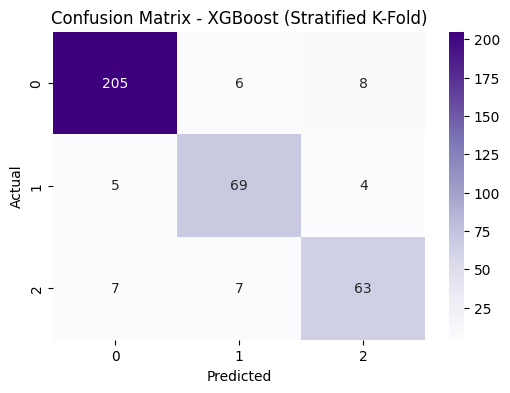

In [31]:
from sklearn.model_selection import StratifiedKFold

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation Score
skfold_scores_xgb = cross_val_score(best_xgboost_model, xgboost_df_x, xgboost_df_y, cv=skf, scoring='accuracy')
print("XGBoost - Stratified K-Fold CV Scores:", skfold_scores_xgb)
print("Mean Accuracy (Stratified K-Fold):", skfold_scores_xgb.mean())

# Cross-validation Predict
skfold_preds_xgb = cross_val_predict(best_xgboost_model, xgboost_df_x, xgboost_df_y, cv=skf)

# Evaluation
print("Confusion Matrix (Stratified K-Fold):")
print(confusion_matrix(xgboost_df_y, skfold_preds_xgb))
print("Classification Report (Stratified K-Fold):")
print(classification_report(xgboost_df_y, skfold_preds_xgb))

# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(xgboost_df_y, skfold_preds_xgb), annot=True, cmap="Purples", fmt='g')
plt.title("Confusion Matrix - XGBoost (Stratified K-Fold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 5. Result Visualization

Karena terdapat banyak feature yang bisa kita pertimbangkan untuk visualisasi hasil pengelompokan maka kami mencari beberapa feature yang memiliki importance yang lebih tinggi daripada yang lain sebagai titik tumpuan untuk melakukan visualisasi hasil klasifikasi

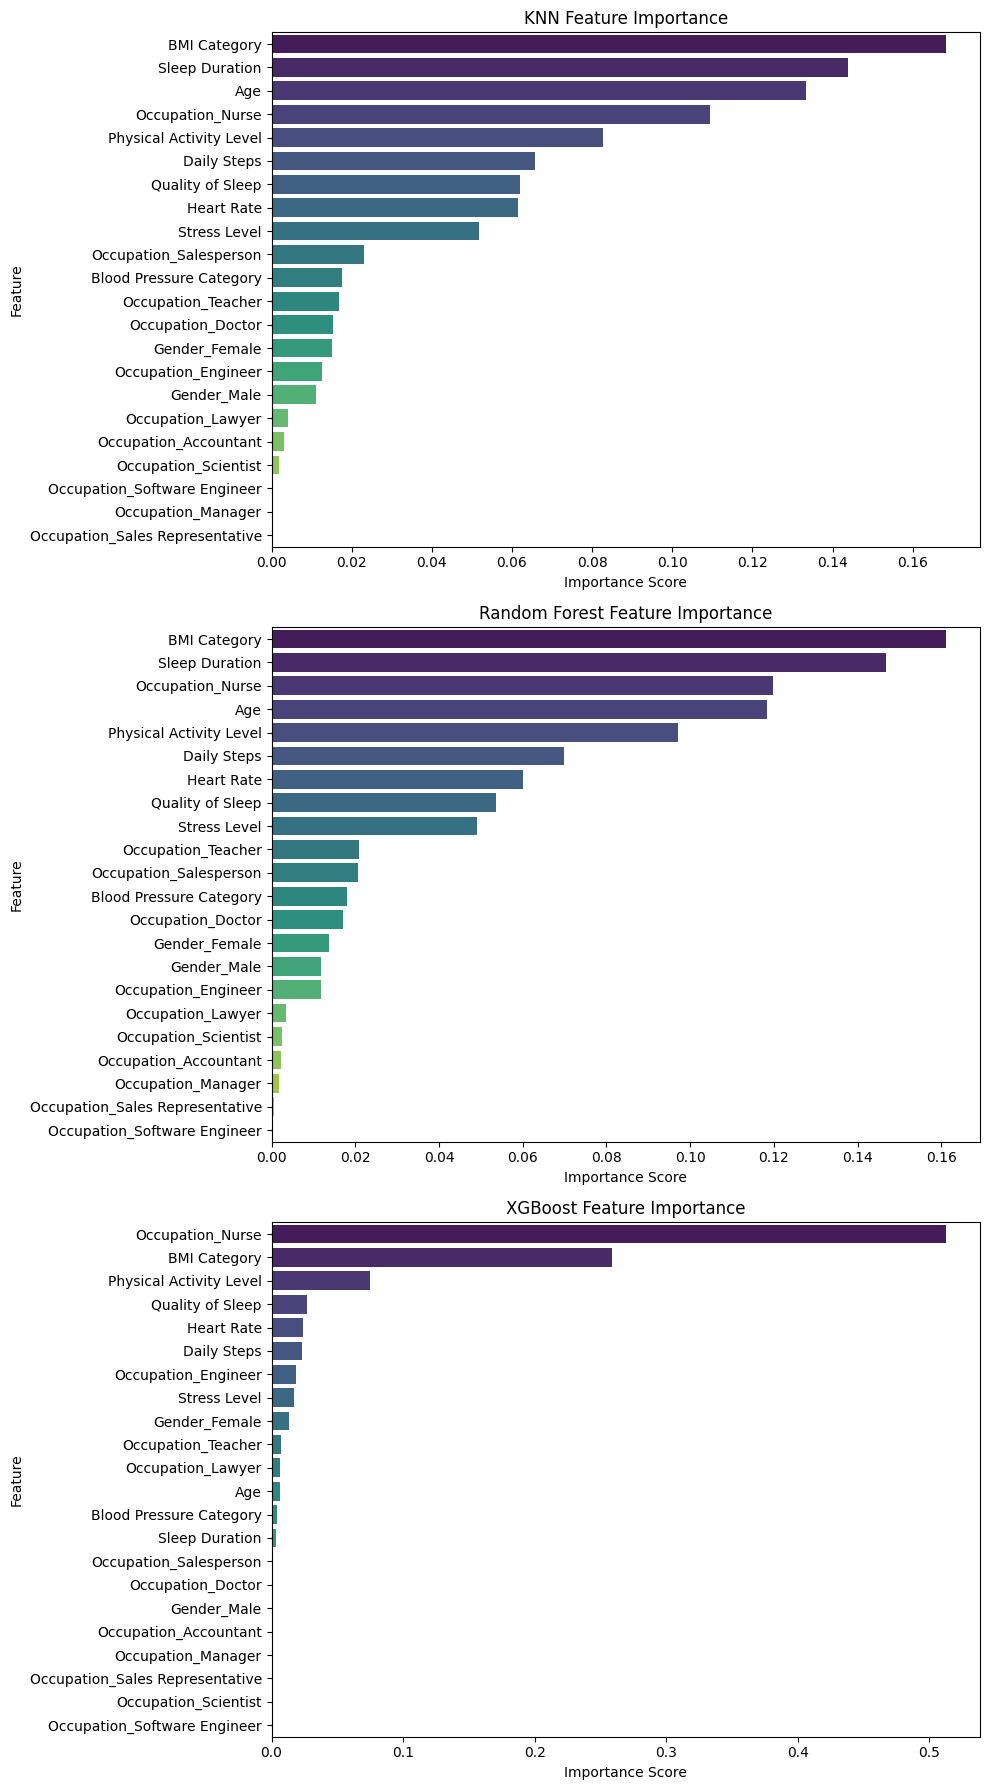

In [32]:
plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 1)
importances = grid_search_rf.best_estimator_.feature_importances_
feature_names = rf_X_test.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('KNN Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.subplot(3, 1, 2)
importances = best_rf_model.feature_importances_
feature_names = knn_X_test.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.subplot(3, 1, 3)
importances = best_xgboost_model.feature_importances_
feature_names = xgboost_X_test.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()


Dari visualisasi diatas bisa dilihat tingkat kepentingan feature yang ada di dataset kami dan kami memilih fitur-fitur berikut untuk menjadi tumpuan untuk melakukan visualisasi klasifikasi tiap model:
1. KNN & Random Forest: Age dan Sleep Duration
2. XGBoost : Quality of Sleep dan Physical Activity Level


### A. KNN

Visualisasi hasil klasifikasi bisa dilihat melalui perbandingan antara visualisasi data sebenarnya atau data test yang digunakan

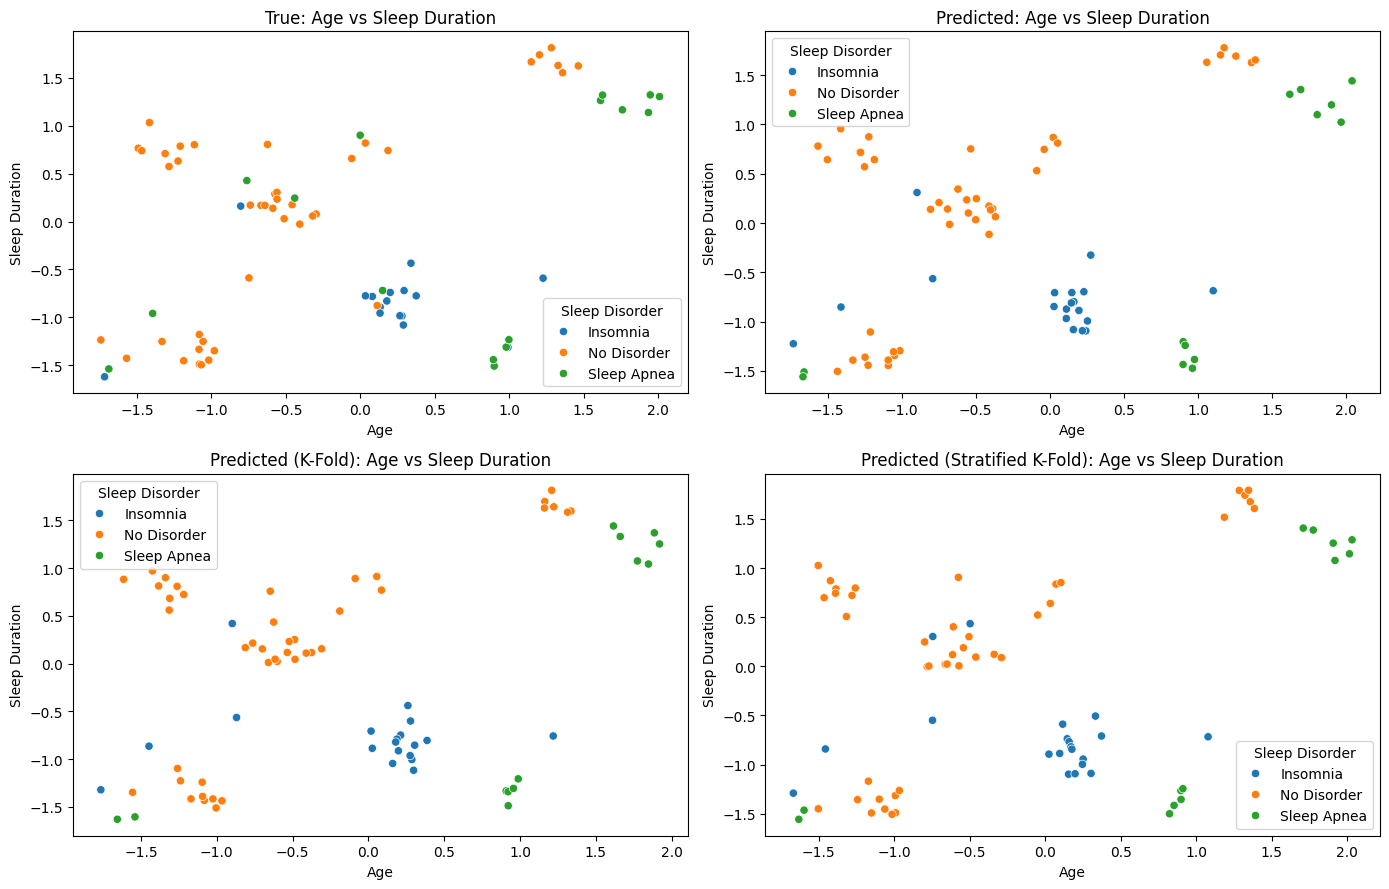

In [33]:
def plot_knn(knn_data):
  knn_predict_col = pd.DataFrame(knn_data, index=knn_X_test.index)
  knn_predict_col.columns = ['Sleep Disorder']
  knn_predict = pd.concat([knn_X_test, knn_predict_col], axis=1)
  knn_predict['Age'] = knn_predict['Age'] + np.random.uniform(-jitter_val, jitter_val, size=len(knn_predict))
  knn_predict['Sleep Duration'] = knn_predict['Sleep Duration'] + np.random.uniform(-jitter_val, jitter_val, size=len(knn_predict))
  sns.scatterplot(data=knn_predict, x='Age', y='Sleep Duration', hue='Sleep Disorder', hue_order=sleep_disorder_categories)

knn_test = pd.concat([knn_X_test, knn_y_test], axis=1)
jitter_val = 0.1
sleep_disorder_categories = ['Insomnia', 'No Disorder', 'Sleep Apnea']
knn_test['Age'] = knn_test['Age'] + np.random.uniform(-jitter_val, jitter_val, size=len(knn_test))
knn_test['Sleep Duration'] = knn_test['Sleep Duration'] + np.random.uniform(-jitter_val, jitter_val, size=len(knn_test))
fig = plt.figure(figsize=(14, 9))

plt.subplot(2, 2, 1)
sns.scatterplot(data=knn_test, x='Age', y='Sleep Duration', hue='Sleep Disorder', hue_order=sleep_disorder_categories)
plt.title('True: Age vs Sleep Duration')

plt.subplot(2, 2, 2)
plot_knn(knn_prediction)
plt.title('Predicted: Age vs Sleep Duration')

plt.subplot(2, 2, 3)
plot_knn(kfold_knn_prediction)
plt.title('Predicted (K-Fold): Age vs Sleep Duration')

plt.subplot(2, 2, 4)
plot_knn(skfold_knn_prediction)
plt.title('Predicted (Stratified K-Fold): Age vs Sleep Duration')

plt.tight_layout()
plt.show()

Terdapat pengelompokan yang cukup jelas pada data awalnya dan pengelompokan tersebut bisa lebih terlihat pada hasil dari model yang kami buat dengan orang mengalami insomnia ketika mereka berumur sekitar 42 - 45 dan tidur diantara 6.2 - 6.7 jam sedangkan orang akan mengalami sleep apnea ketika mereka berumur 50 atau 58 dan tidur selama 6 jam atau 8 jam secara berturut-turut.

### B. Random Forest

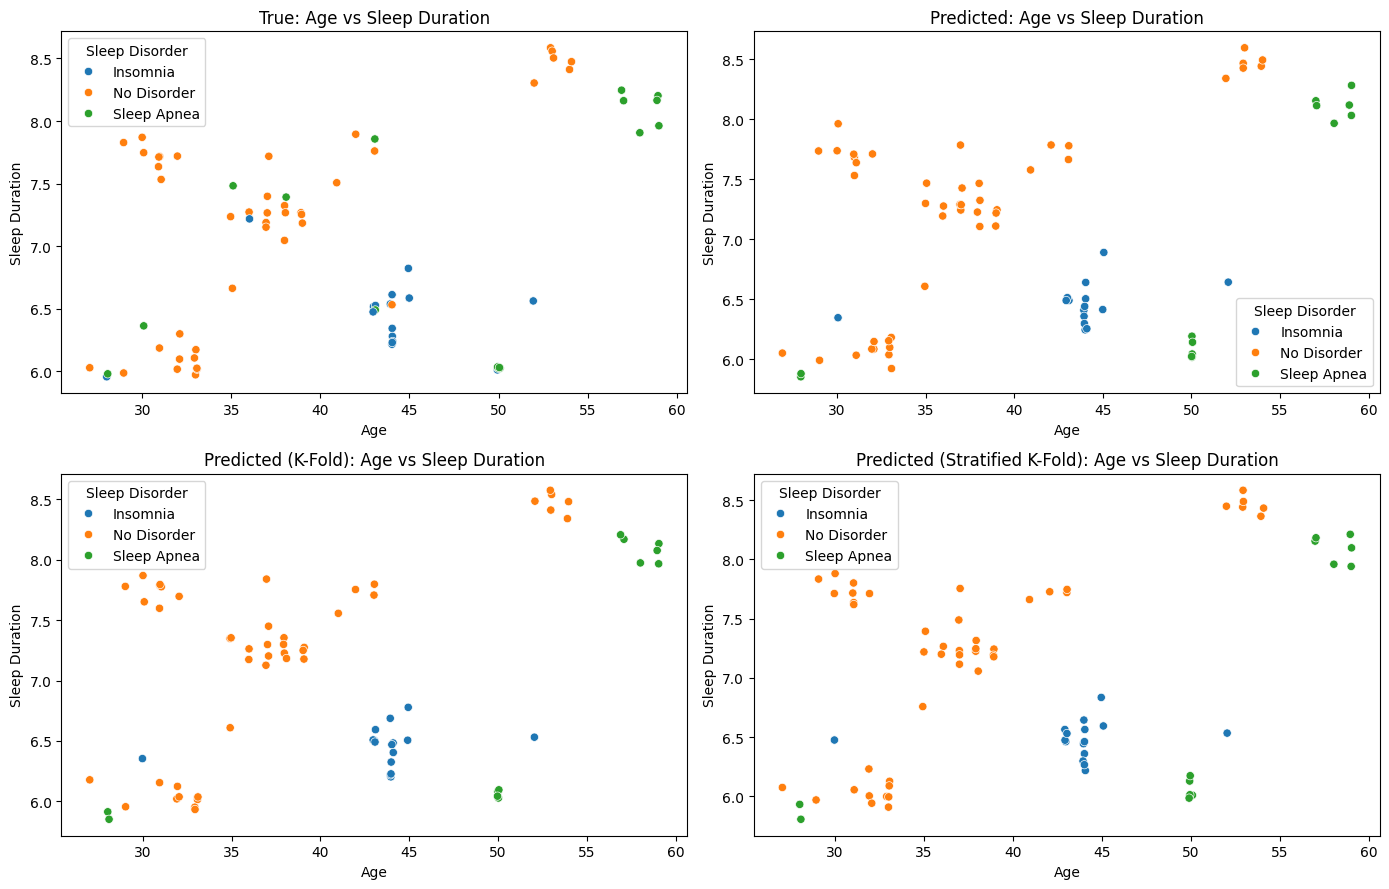

In [34]:
def plot_rf(rf_data):
  rf_predict_col = pd.DataFrame(rf_data, index=rf_X_test.index)
  rf_predict_col.columns = ['Sleep Disorder']
  rf_predict = pd.concat([rf_X_test, rf_predict_col], axis=1)
  rf_predict['Age'] = rf_predict['Age'] + np.random.uniform(-jitter_val, jitter_val, size=len(rf_predict))
  rf_predict['Sleep Duration'] = rf_predict['Sleep Duration'] + np.random.uniform(-jitter_val, jitter_val, size=len(rf_predict))
  sns.scatterplot(data=rf_predict, x='Age', y='Sleep Duration', hue='Sleep Disorder', hue_order=sleep_disorder_categories)

rf_test = pd.concat([rf_X_test, rf_y_test], axis=1)
jitter_val = 0.1
sleep_disorder_categories = ['Insomnia', 'No Disorder', 'Sleep Apnea']
rf_test['Age'] = rf_test['Age'] + np.random.uniform(-jitter_val, jitter_val, size=len(rf_test))
rf_test['Sleep Duration'] = rf_test['Sleep Duration'] + np.random.uniform(-jitter_val, jitter_val, size=len(rf_test))
fig = plt.figure(figsize=(14, 9))

plt.subplot(2, 2, 1)
sns.scatterplot(data=rf_test, x='Age', y='Sleep Duration', hue='Sleep Disorder', hue_order=sleep_disorder_categories)
plt.title('True: Age vs Sleep Duration')

plt.subplot(2, 2, 2)
plot_rf(rf_prediction)
plt.title('Predicted: Age vs Sleep Duration')

plt.subplot(2, 2, 3)
plot_rf(kfold_rf_prediction)
plt.title('Predicted (K-Fold): Age vs Sleep Duration')

plt.subplot(2, 2, 4)
plot_rf(skfold_rf_prediction)
plt.title('Predicted (Stratified K-Fold): Age vs Sleep Duration')

plt.tight_layout()
plt.show()

Terdapat pengelompokan yang cukup jelas pada data awalnya dan pengelompokan tersebut bisa lebih terlihat pada hasil dari model yang kami buat dengan orang mengalami insomnia ketika mereka berumur sekitar 42 - 45 dan tidur diantara 6.2 - 6.7 jam sedangkan orang akan mengalami sleep apnea ketika mereka berumur 50 atau 58 dan tidur selama 6 jam atau 8 jam secara berturut-turut.

### C. XGBoost

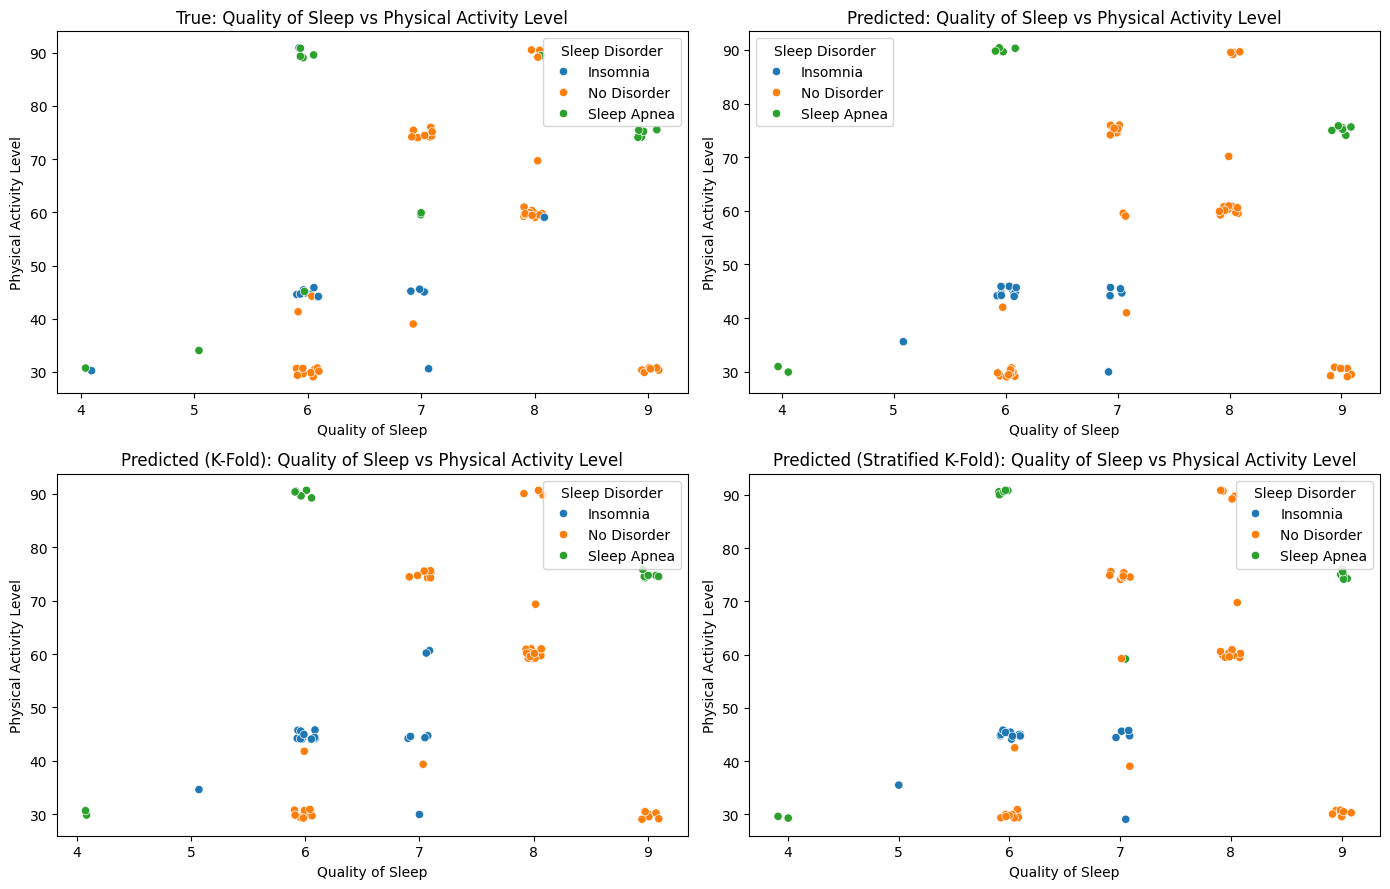

In [35]:
def label_to_disorder(label):
    if label == 0:
        return 'No Disorder'
    elif label == 1:
        return 'Sleep Apnea'
    else:
        return 'Insomnia'
def plot_xgboost(xgboost_data):
  xgboost_predict_col = pd.DataFrame(xgboost_data, index=xgboost_X_test.index)
  xgboost_predict_col.columns = ['Sleep Disorder']
  xgboost_predict = pd.concat([xgboost_X_test, xgboost_predict_col], axis=1)
  xgboost_predict['Quality of Sleep'] = xgboost_predict['Quality of Sleep'] + np.random.uniform(-jitter_val, jitter_val, size=len(xgboost_predict))
  xgboost_predict['Physical Activity Level'] = xgboost_predict['Physical Activity Level'] + np.random.uniform(-jitter_high, jitter_high, size=len(xgboost_predict))
  xgboost_predict['Sleep Disorder'] = xgboost_predict['Sleep Disorder'].apply(label_to_disorder)
  sns.scatterplot(data=xgboost_predict, x='Quality of Sleep', y='Physical Activity Level', hue='Sleep Disorder', hue_order=sleep_disorder_categories)

xgboost_test = pd.concat([xgboost_X_test, xgboost_y_test], axis=1)
jitter_val = 0.1
jitter_high = 1
sleep_disorder_categories = ['Insomnia', 'No Disorder', 'Sleep Apnea']

xgboost_test['Quality of Sleep'] = xgboost_test['Quality of Sleep'] + np.random.uniform(-jitter_val, jitter_val, size=len(xgboost_test))
xgboost_test['Physical Activity Level'] = xgboost_test['Physical Activity Level'] + np.random.uniform(-jitter_high, jitter_high, size=len(xgboost_test))
xgboost_test['Sleep Disorder'] = xgboost_test['Sleep Disorder'].apply(label_to_disorder)
fig = plt.figure(figsize=(14, 9))

plt.subplot(2, 2, 1)
sns.scatterplot(data=xgboost_test, x='Quality of Sleep', y='Physical Activity Level', hue='Sleep Disorder', hue_order=sleep_disorder_categories)
plt.title('True: Quality of Sleep vs Physical Activity Level')

plt.subplot(2, 2, 2)
plot_xgboost(xgboost_prediction)
plt.title('Predicted: Quality of Sleep vs Physical Activity Level')

plt.subplot(2, 2, 3)
plot_xgboost(kfold_xgboost_prediction)
plt.title('Predicted (K-Fold): Quality of Sleep vs Physical Activity Level')

plt.subplot(2, 2, 4)
plot_xgboost(skfold_xgboost_prediction)
plt.title('Predicted (Stratified K-Fold): Quality of Sleep vs Physical Activity Level')

plt.tight_layout()
plt.show()

Terdapat pengelompokan yang cukup jelas pada data awalnya dan pengelompokan tersebut bisa lebih terlihat pada hasil dari model yang kami buat dengan orang mengalami insomnia ketika mereka tidak terlalu sering berolahraga dan kualitas tidur yang sedang sedangkan orang akan mengalami sleep apnea ketika mereka memiliki kualitas tidur yang tinggi atau sedang dan sering melakukan aktivitas fisik.

# Kesimpulan

Model yang kami buat bisa digunakan untuk memprediksi adanya gangguan tidur atau tidak dengan cukup akurat yang terbukti dari berbagai metrik evaluasi yang digunakan yang memberikan nilai akurasi yang cukup tinggi.

Dari model yang dibuat kami juga menemukan beberapa feature yang memengaruhi adanya gangguan tidur atau tidak lebih dari fitur lain yaitu:
- Bekerja sebagai suster
- Usia
- Durasi Tidur
- Kategori BMI
- Aktivitas Kegiatan Fisik

# Kontribusi Anggota

|                        | Kontribusi menurut anggota kelompok 1 | Kontribusi menurut anggota kelompok 2 | Kontribusi menurut anggota kelompok 3 | Rata-rata kontribusi anggota kelompok |
|------------------------|----------------------------------------|----------------------------------------|----------------------------------------|----------------------------------------|
| Anggota kelompok 1     | 33.33%                                | 33.33%                                | 33.33%                                | 33.33%                                |
| Anggota kelompok 2     | 33.33%                                | 33.33%                                | 33.33%                                | 33.33%                                |
| Anggota kelompok 3     | 33.33%                                | 33.33%                                | 33.33%                                | 33.33%                                |
| **Total**              | **Total = 100%**                      | **Total = 100%**                      | **Total = 100%**                      | **Total = 100%**                      |
